In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
import scipy.stats as stats
from scipy.stats             import ttest_1samp,ttest_ind, ttest_rel
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

In [9]:
a = pd.read_table('C:/Users/The Josephs/Downloads/LE mini/Airfares.txt', delim_whitespace=True,header=None,names=('City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','price-h','Low price airline','market share.1','price-l'))

In [10]:
a.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,price-h,Low price airline,market share.1,price-l
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [11]:
a.describe()

,Average Fare,Distance,Average weekly passengers,market share,price-h,market share.1,price-l
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
price-h                      1000 non-null float64
Low price airline            1000 non-null object
market share.1               1000 non-null float64
price-l                      1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [13]:
a.isnull().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share                 0
price-h                      0
Low price airline            0
market share.1               0
price-l                      0
dtype: int64

In [14]:
categorical = a.select_dtypes(include=['object'])

In [15]:
categorical

,City1,City2,market leading airline,Low price airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN
...,...,...,...,...
995,SYR,TPA,US,DL
996,TLH,TPA,FL,FL
997,TPA,IAD,US,DL
998,TPA,PBI,WN,WN


In [16]:
df_categorical=a[['City1','City2','market leading airline','Low price airline']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City1,City2,market leading airline,Low price airline
0,16,0,6,8
1,16,40,6,6
2,2,0,4,5
3,2,7,14,17
4,2,52,12,17


In [17]:
a = a.drop(df_categorical.columns, axis=1)
a= pd.concat([a, df_categorical], axis=1)
a.head()

,Average Fare,Distance,Average weekly passengers,market share,price-h,market share.1,price-l,City1,City2,market leading airline,Low price airline
0,114.47,528,424.56,70.19,111.03,70.19,111.03,16,0,6,8
1,122.47,860,276.84,75.10,123.09,17.23,118.94,16,40,6,6
2,214.42,852,215.76,78.89,223.98,2.77,167.12,2,0,4,5
3,69.40,288,606.84,96.97,68.86,96.97,68.86,2,7,14,17
4,158.13,723,313.04,39.79,161.36,15.34,145.42,2,52,12,17


In [18]:
c = a.columns
d = list(c)
d

['Average Fare',
 'Distance',
 'Average weekly passengers',
 'market share',
 'price-h',
 'market share.1',
 'price-l',
 'City1',
 'City2',
 'market leading airline',
 'Low price airline']

In [19]:
for i in d:
    Q1 = np.percentile(a[i],25)
    Q2 = np.percentile(a[i],50)
    Q3 = np.percentile(a[i],75)
    IQR = Q3-Q1
    IQR
    ul = Q3 + (1.5*IQR)
    print(ul)
    ll = Q1 - (1.5*IQR)
    ll
    a[i]=np.where(a[i]>ul,ul,a[i]) # capping

304.51874999999995
2801.0
1538.9849999999997
114.01000000000002
321.31624999999997
112.63874999999999
250.67375000000007
117.125
130.5
29.375
31.0


In [20]:
a.shape # capping process

(1000, 11)

In [21]:
# There are no null values

In [22]:
X = a.drop(["Average Fare"],axis = 1)
Y = a['Average Fare']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X,Y)}')

Coefficients: [ 0.00278584 -0.00237164  0.06330312  0.7345822  -0.03683404  0.20889442
  0.02840101 -0.03029691 -0.2378744   0.11420018]
Intercept: 8.69263185946295
R^2 score: 0.9770707783197984


In [24]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


In [25]:
# R square value for both train and test data to check  the model accuracy
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,Y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, Y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, Y_test)}')

R^2 score for train: 0.9776455760772915
R^2 score for test: 0.9744736759081696


In [26]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average Fare   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4214.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:50:40   Log-Likelihood:                -3521.1
No. Observations:                1000   AIC:                             7064.
Df Residuals:                     989   BIC:                             7118.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         8.6926      1.960      4.435      0.000       4.846      12.539
Distance                      0.0028      0.001      4.738      0.000       0.002       0.004
Average weekly passengers    -0.0024      0.001     -3.693      0.000      -0.004      -0.001
market share                  0.0633      0.017      3.746      0.000       0.030       0.096
price-h                       0.7346      0.010     74.681      0.000       0.715       0.754
market share.1               -0.0368      0.013     -2.907      0.004      -0.062      -0.012
price-l                       0.2089      0.013     16.628      0.000       0.184       0.234
City1                         0.0284      0.012      2.403      0.016       0.005       0.052
City2                        -0.0303      0.012     -2.442      0.015      -0.055      -0.006
market leading airline       -0.2379      0.053     -4.475      0.000      -0.342      -0.134
Low price airline             0.1142      0.047      2.454      0.014       0.023       0.206
==============================================================================
Omnibus:                      153.311   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.295
Skew:                           0.663   Prob(JB):                    1.12e-138
Kurtosis:                       6.673   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
sns.set(style = 'whitegrid')

predictions = lin_reg.predict(X_constant)
residuals = lin_reg.resid
residuals

0     -1.239497
1     -5.847423
2     -0.144877
3     -4.646141
4     -0.266056
         ...   
995    1.693854
996   -5.410314
997   -1.230602
998   -6.502137
999   -3.375153
Length: 1000, dtype: float64

In [28]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(0.6585893751191251, 0.999998156826781)

In [29]:
# P value is greater than 0.05, so we fail to reject the null hypotesis. Hence Residual error is linear

In [30]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(635.2946653049052, 0.0)


In [31]:
# P value is greater than 0.05, so we fail to reject the null hypotesis. Hence Residual error is normal

[('F statistic', 0.9382854942623312), ('p-value', 0.7592530173337115)]

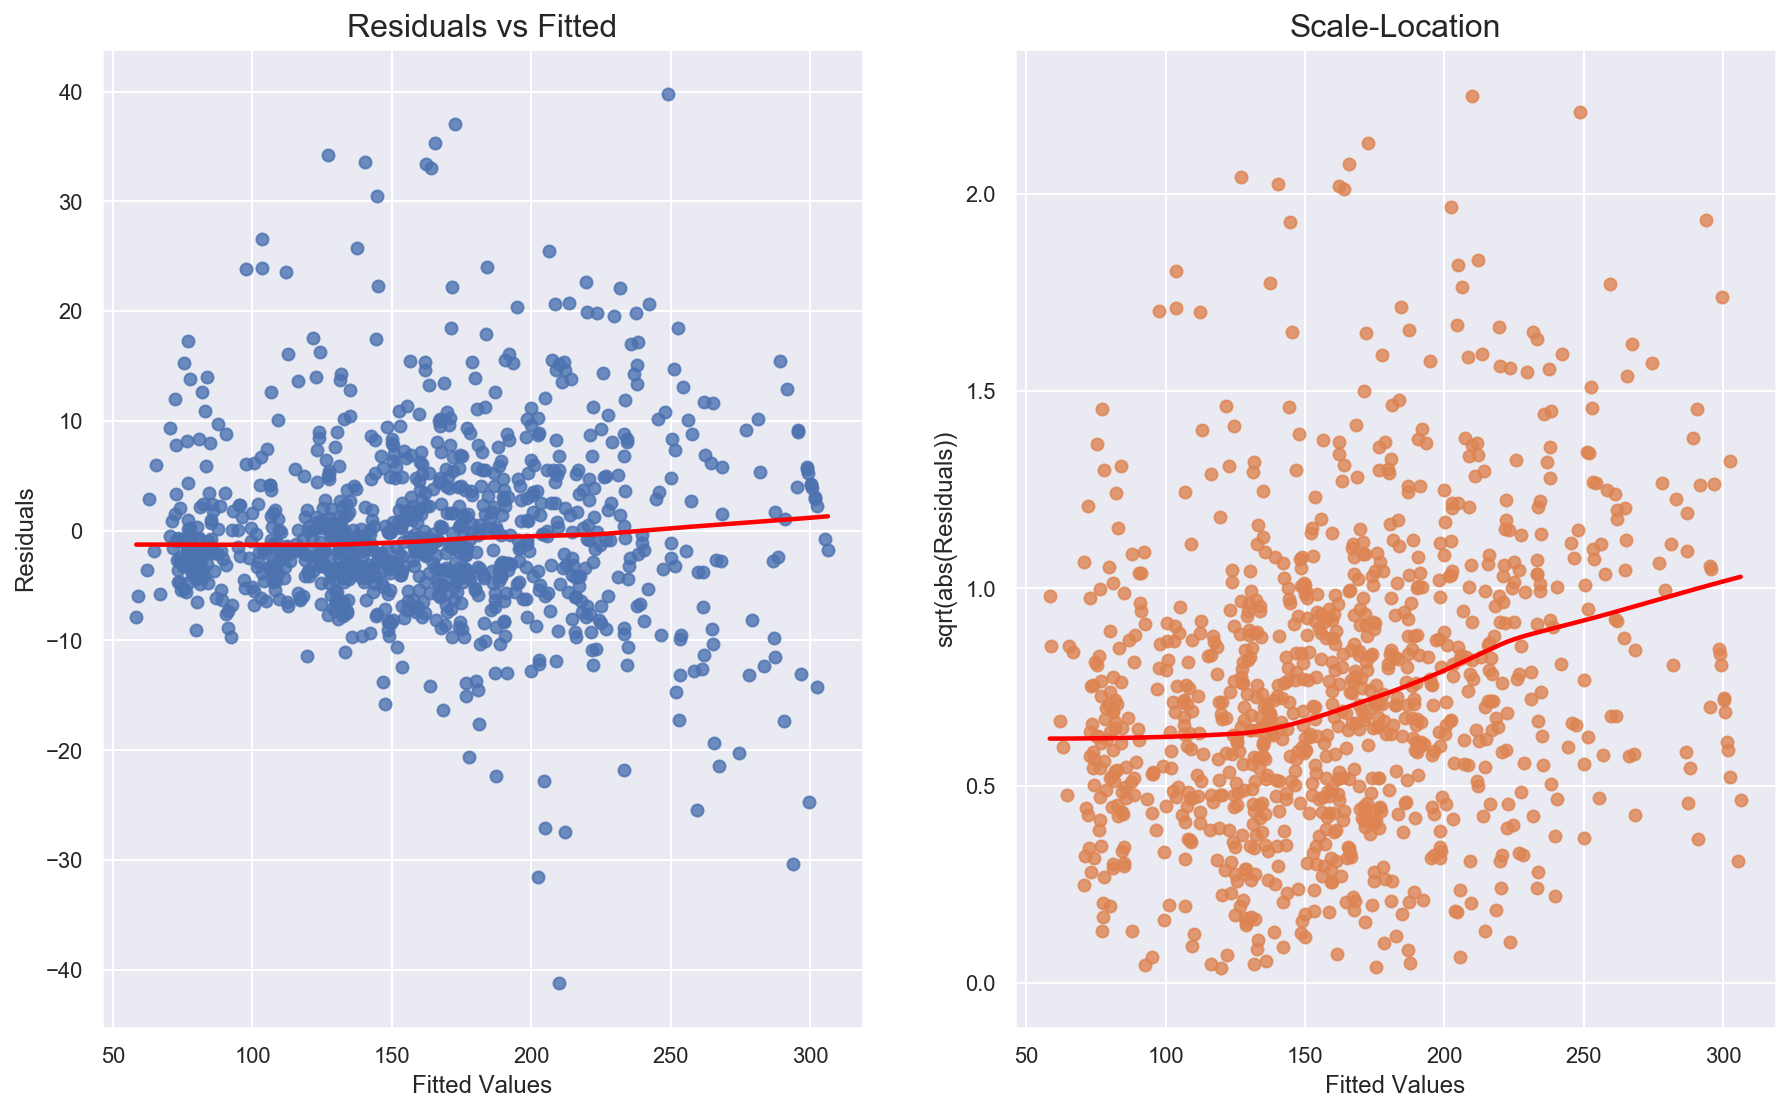

In [32]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

In [33]:
# It is homoscedastic

In [34]:
# As the error distribution is normal, linear and homoscedastic, we need not go for transformation


### Feature selection technique

In [35]:
from sklearn.feature_selection import RFE

In [36]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,Y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,Y_train)
    score = model.score(X_test_rfe,Y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.977032


In [37]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['market share', 'price-h', 'market share.1', 'price-l', 'City1',
       'market leading airline', 'Low price airline'],
      dtype='object')


In [38]:
X = a[['market share', 'price-h', 'market share.1', 'price-l', 'City1',
       'market leading airline', 'Low price airline']]
Y = a['Average Fare']

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.model_selection import train_test_split
# train data - 70% and test data - 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 12345)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(700, 7)
(300, 7)
(700,)
(300,)


In [40]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,Y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, Y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, Y_test)}')

R^2 score for train: 0.9760680920978222
R^2 score for test: 0.9761274166268278


### Ridge

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [42]:
rr = Ridge(alpha=100)
rr.fit(X_train, Y_train)

Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)

print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

ridge regression train score low alpha: 0.9760680810677457
ridge regression test score low alpha: 0.9761259616124661


### Elastic net

In [43]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

In [44]:
cv_model = ElasticNetCV(l1_ratio=[.1, .1, .1, .5, .6,.7,.9], eps=0.001, n_alphas=10, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=5000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [45]:
cv_model.fit(X_train, Y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00227223
Optimal l1_ratio: 0.900
Number of iterations 16


In [46]:
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, Y_train)
print('train',r2_score(Y_train, model.predict(X_train)))
print('test',r2_score(Y_test, model.predict(X_test)))

train 0.9615678902829414
test 0.9647039397045113


In [47]:
# Here the number of features is less. So, it is better to go with ridge or elastic net with a lesser l1 ratio for hyperparameter tuning.